In [207]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

# Ignore the warning
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [208]:
import pandas as pd
import numpy as np

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [209]:
#Reading the dataset

data = pd.read_csv('agg_match_stats_4_reduced.csv')

data.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,37.919838,20,0,m3xdave,106.351,100000,88
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,292.205048,3457.036130,387,3,UDaddyHere,1690.021,100006,8
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,106.215900,0,0,Dummy05,103.415,100010,89
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,126.959831,91,0,NA-Wuyifan,272.838,100019,67
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,43.346710,0,0,kickinchicken,134.342,100024,81


In [210]:
data['player_kills'].max()

30

In [211]:
data['player_kills'].mean()

np.float64(0.8856)

In [212]:
# Using percentiles to define aggressive vs passive
kills_threshold = data['player_kills'].quantile(0.7)   # top 30% in kills
damage_threshold = data['player_dmg'].quantile(0.7) # top 30% in damage

In [213]:
print(kills_threshold, damage_threshold)

1.0 145.0


In [214]:
# Create a new column 'play_style' based on if player passes player kill threshold or damage threshold
def play_style(row):
    if row['player_kills'] >= kills_threshold or row['player_dmg'] >= damage_threshold:
        return 'aggressive'
    else:
        return 'passive'

In [215]:
df = data.copy()

In [216]:
df['play_style'] = df.apply(play_style, axis=1)

In [217]:
df.head()

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,play_style
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,37.919838,20,0,m3xdave,106.351,100000,88,passive
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,292.205048,3457.036130,387,3,UDaddyHere,1690.021,100006,8,aggressive
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,106.215900,0,0,Dummy05,103.415,100010,89,passive
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,126.959831,91,0,NA-Wuyifan,272.838,100019,67,passive
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,43.346710,0,0,kickinchicken,134.342,100024,81,passive


In [218]:
df['play_style'].value_counts()

play_style
passive       2734
aggressive    2266
Name: count, dtype: int64

Here we can see that there is an slight balance of play style between players. However there are more passive players than there are aggressive players.

In [219]:
#Encode the play_style label as an integer. Use `LabelEncoder` to fit_transform the "play_style" column.
from sklearn.preprocessing import LabelEncoder

label_encode = LabelEncoder()
y_data_encoded = label_encode.fit_transform(df['play_style'])

print(label_encode.classes_)
df['play_style'] = y_data_encoded

df.head()

['aggressive' 'passive']


,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement,play_style
0,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,37.919838,20,0,m3xdave,106.351,100000,88,1
1,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,292.205048,3457.036130,387,3,UDaddyHere,1690.021,100006,8,0
2,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,106.215900,0,0,Dummy05,103.415,100010,89,1
3,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,126.959831,91,0,NA-Wuyifan,272.838,100019,67,1
4,2017-10-31T02:41:53+0000,95,2U4GBNA0YmmhivBOFUiipklIPVdC0DRgkX88eyhTYGiAno...,tpp,1,0,0,0.000000,43.346710,0,0,kickinchicken,134.342,100024,81,1


In [220]:
# Splitting the dataset into x_data and y_data
x_data = df[['game_size', 'party_size', 'player_assists', 'player_dist_ride', 'player_dist_walk', 'player_dmg', 'player_survive_time']]
y_data = df.iloc[:, -1]

In [221]:
print(x_data)

      game_size  party_size  player_assists  player_dist_ride  \
0            95           1               0          0.000000   
1            95           1               0        292.205048   
2            95           1               0          0.000000   
3            95           1               0          0.000000   
4            95           1               0          0.000000   
...         ...         ...             ...               ...   
4995         99           1               0          0.000000   
4996         99           1               0         10.359257   
4997         99           1               0          0.000000   
4998         99           1               0          0.000000   
4999         99           1               0          0.000000   

      player_dist_walk  player_dmg  player_survive_time  
0            37.919838          20              106.351  
1          3457.036130         387             1690.021  
2           106.215900           0           

In [222]:
print(y_data)

0       1
1       0
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    0
Name: play_style, Length: 5000, dtype: int64


In [223]:
# Ensures the same ratio of play_style class in both sets, applying Scikit-learn’s StratifiedShuffleSplit.
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_index, test_index = next(sss.split(x_data, y_data))

x_train = x_data.iloc[train_index]
y_train = y_data.iloc[train_index]

x_test = x_data.iloc[test_index]
y_test = y_data.iloc[test_index]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [224]:
# 0 is aggressive, and 1 is passive
y_train.value_counts(normalize=True)

play_style
1    0.546857
0    0.453143
Name: proportion, dtype: float64

In [225]:
y_test.value_counts(normalize=True)

play_style
1    0.546667
0    0.453333
Name: proportion, dtype: float64

In [236]:
from sklearn.linear_model import LogisticRegression

# Fitting a logistic regression model without any regularization using the feature and performing prediction.
logi_reg = LogisticRegression()
logi_reg = logi_reg.fit(x_train_scaled, y_train)

y_predict = logi_reg.predict(x_test_scaled)

In [237]:
from sklearn.metrics import accuracy_score
#Calculating accuracy score for model without regularization
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.902


In [228]:
# The accuracy seems pretty high, lets apply cv.
from sklearn.linear_model import LogisticRegressionCV

#Using cross validation to determine the hyperparameters, fit models using L2 regularization and perform prediction.
logi_reg_cv = LogisticRegressionCV()
logi_reg_cv = logi_reg_cv.fit(x_train_scaled, y_train)
y_predict_cv = logi_reg_cv.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_predict_cv))

Accuracy: 0.904


In [229]:
#Accuracy
print(f"Accuracy - NO regularization:, {accuracy_score(y_test, y_predict)}") # NO regularization
print(f"Accuracy - WITH regularization:, {accuracy_score(y_test, y_predict_cv)}") # WITH regularization
print("\n")

precision_no_reg, recall_no_reg, fscore_no_reg, _ = score(y_test, y_predict, average='weighted')
precision_reg, recall_reg, fscore_reg, _ = score(y_test, y_predict_cv, average='weighted')

#Precision
print(f"Precision - NO regularization {precision_no_reg}")
print(f"Precision - WITH regularization {precision_reg}")
print("\n")

#Recall
print(f"Recall - NO regularization {recall_no_reg}")
print(f"Recall - WITH regularization {recall_reg}")
print("\n")

#F1 Score
print(f"F1 Score - NO regularization {fscore_no_reg}")
print(f"F1 Score - WITH regularization {fscore_reg}")
print("\n")

Accuracy - NO regularization:, 0.902
Accuracy - WITH regularization:, 0.904


Precision - NO regularization 0.9019475460172329
Precision - WITH regularization 0.9039787840291683


Recall - NO regularization 0.902
Recall - WITH regularization 0.904


F1 Score - NO regularization 0.9019410099385088
F1 Score - WITH regularization 0.9039877730918328




In [230]:
from sklearn.metrics import classification_report

# Generate report for each play_style
report = classification_report(y_test, y_predict, target_names=label_encode.classes_)
print(report)

              precision    recall  f1-score   support

  aggressive       0.90      0.89      0.89       680
     passive       0.91      0.92      0.91       820

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



In [231]:
y_predict
conf_matrx = confusion_matrix(y_test, y_predict)
print(conf_matrx)

[[602  78]
 [ 69 751]]


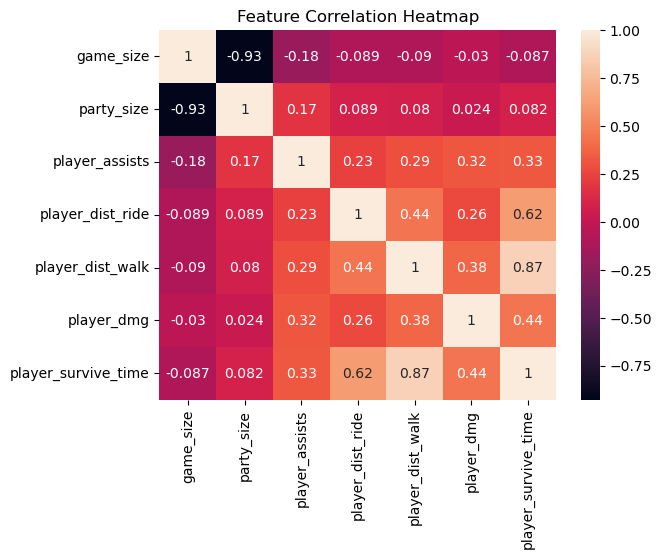

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = x_data.corr()

plt.figure()
sns.heatmap(corr, annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()
